In [4]:
from __future__ import print_function, division

%matplotlib inline
%precision 3
import random
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import random
import networkx as nx
import numpy as np

# import thinkplot

In [5]:
class Student(object):
    """ 
    Base student; used as node in network. 
    """

    def __init__(self, immune_strength=5, tolerance=50):
        self.immune_strength = immune_strength #rate of lowering exposure
        self.tolerance = tolerance # value at which is_sick
        self.exposure = 0
        self.is_sick = 0 # 0: not sick; 1: sick; 2: was sick already
        
    def process_exposure(self):
        if self.is_sick == 2:
            return
        self.exposure -= self.immune_strength
        
        if self.is_sick == 1:
            if self.exposure <= 0:
                self.is_sick = 2
        elif self.is_sick == 0:
            if self.exposure >= self.tolerance:
                self.is_sick = 1


In [57]:
def create_student_ba_graph(size=50, new_edges_per_node=3):
    """ 
    Creates a graph of [size] Student nodes, using weighted connections.
    Eventually, efficiency might be a concern here. Should be fine
    for n=90, though.
    TODO: vary the edges new nodes introduce.
    TODO: roommates, relationships, etc - "colored" edges.
    """
    G = nx.Graph()
    if size <= 0:
        return G
    
    first_student = Student()
    G.add_node(first_student)
    
    students_list = []
    students_list.append([first_student,0])
    
    for i in range(size):
        new_student = Student(
            immune_strength = random.randint(4,8), 
            tolerance = random.randint(40,80));
        G.add_node(new_student)
        all_students = range(len(students_list))
        probs_base = [float(k[1]+1) for k in students_list]
        probs = probs_base/np.sum(probs_base)
        number_of_friends = min(len(students_list), new_edges_per_node)
        new_friends = np.random.choice(all_students, size=number_of_friends, replace=False, p=probs)
        for friend in new_friends:
            students_list[friend][1] += 1
            G.add_edge(new_student, students_list[friend][0])
        students_list.append([new_student, nx.degree(G, new_student)])

        
    social = {}
    for edge in G.edges():
        social[edge] = random.randint(1,10)
        
    nx.set_edge_attributes(G, "social", social)

    all_nodes = G.nodes()[:]
    random.shuffle(all_nodes)
    for i in range(len(all_nodes) // 2):
        first_roommate = all_nodes[2*i]
        second_roommate = all_nodes[(2*i) + 1]
        if not G.has_edge(first_roommate, second_roommate):
            G.add_edge(first_roommate, second_roommate)
            this_pair = G[first_roommate][second_roommate]
            this_pair["social"] = 20
        else:
            this_pair = G[first_roommate][second_roommate]
            this_pair["social"] = 20
            

    
    return G

def draw_sickness_graph(G, pos):
    """ 
    Draws a graph, with red as sick, 
    blue as recovered, 
    green as never sick? colors are iffy right now.
    """
    sick_nodes = [node for node in G.nodes() if node.is_sick == 1]
    recovered_nodes = [node for node in G.nodes() if node.is_sick == 2]
    healthy_nodes = [node for node in G.nodes() if node.is_sick == 0]

    nx.draw_networkx_nodes(G, pos, nodelist=sick_nodes, node_color='r')
    nx.draw_networkx_nodes(G, pos, nodelist=healthy_nodes, node_color='g')
    nx.draw_networkx_nodes(G, pos, nodelist=recovered_nodes, node_color='b')
    nx.draw_networkx_edges(G, pos)
    plt.axis('off')
    plt.show()

In [58]:
def step(G):
    for node in G.nodes():
        if node.is_sick == 0:
            for neighbor in G.neighbors(node):
                if neighbor.is_sick == 1:
                    node.exposure += G[node][neighbor]["social"]
    for node in G.nodes():
        node.process_exposure() #separate step

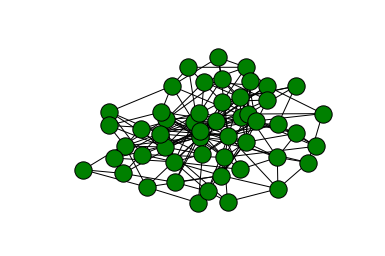

In [59]:
G = create_student_ba_graph()
G_positions = nx.drawing.spring_layout(G) 
draw_sickness_graph(G, G_positions)

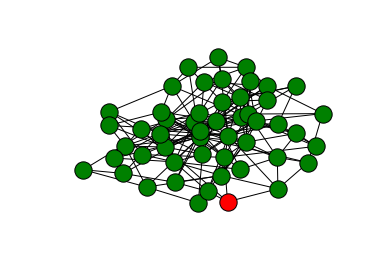

In [60]:
patient_zero = random.choice(G.nodes())
patient_zero.exposure = 100
patient_zero.is_sick = 1
draw_sickness_graph(G, G_positions)

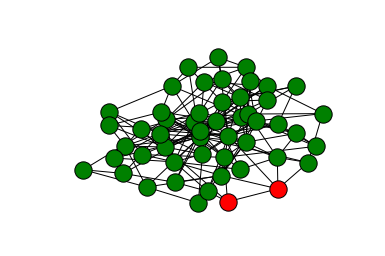

In [61]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

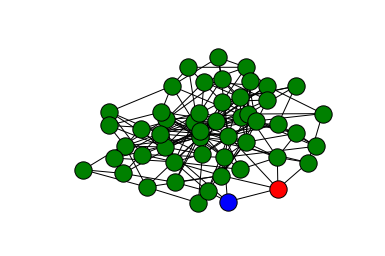

In [62]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

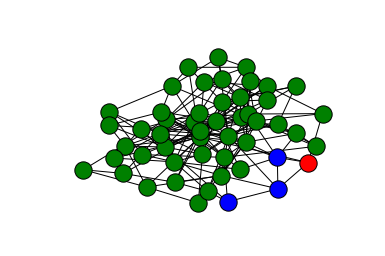

In [63]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

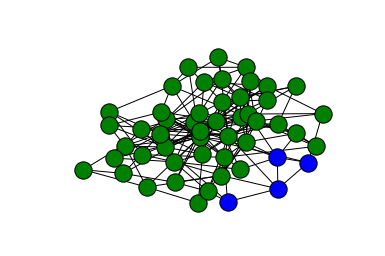

In [64]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

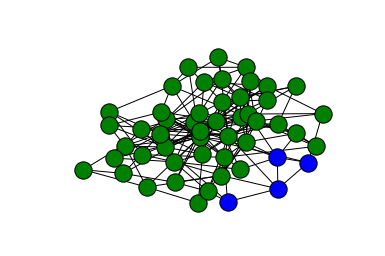

In [65]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

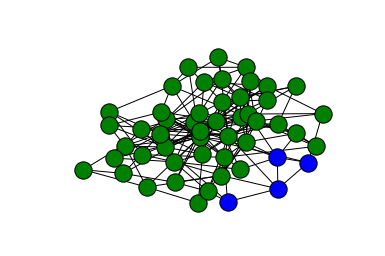

In [66]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

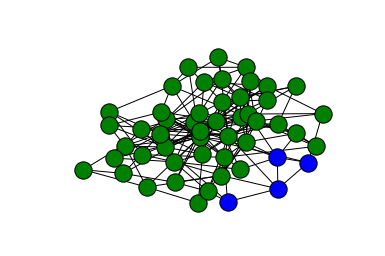

In [67]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

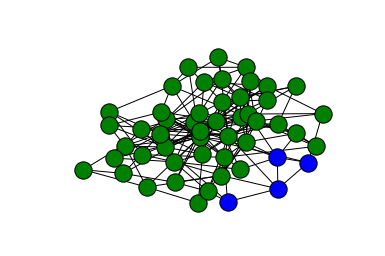

In [68]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

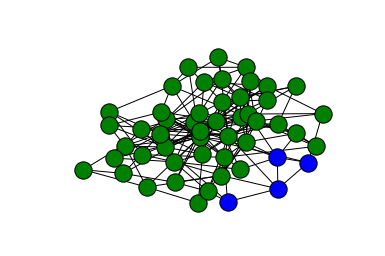

In [69]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)

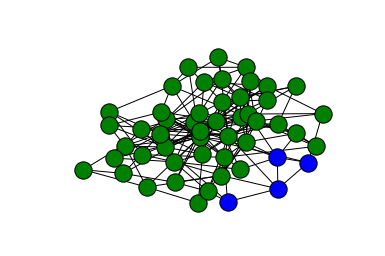

In [70]:
for i in range(10):
    step(G)
draw_sickness_graph(G, G_positions)